rbf
Accuracy: 0.9208842350203607
F1 Score: 0.0
Recall: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       136
         2.0       0.92      1.00      0.96      1583

    accuracy                           0.92      1719
   macro avg       0.46      0.50      0.48      1719
weighted avg       0.85      0.92      0.88      1719



c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

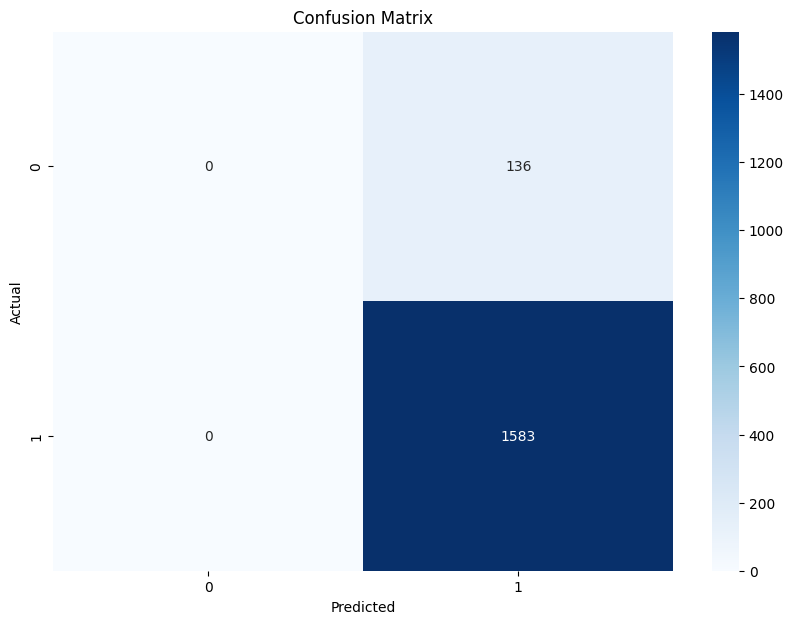

sigmoid
Accuracy: 0.8929610238510762
F1 Score: 0.061224489795918366
Recall: 0.04411764705882353
              precision    recall  f1-score   support

         1.0       0.10      0.04      0.06       136
         2.0       0.92      0.97      0.94      1583

    accuracy                           0.89      1719
   macro avg       0.51      0.51      0.50      1719
weighted avg       0.86      0.89      0.87      1719



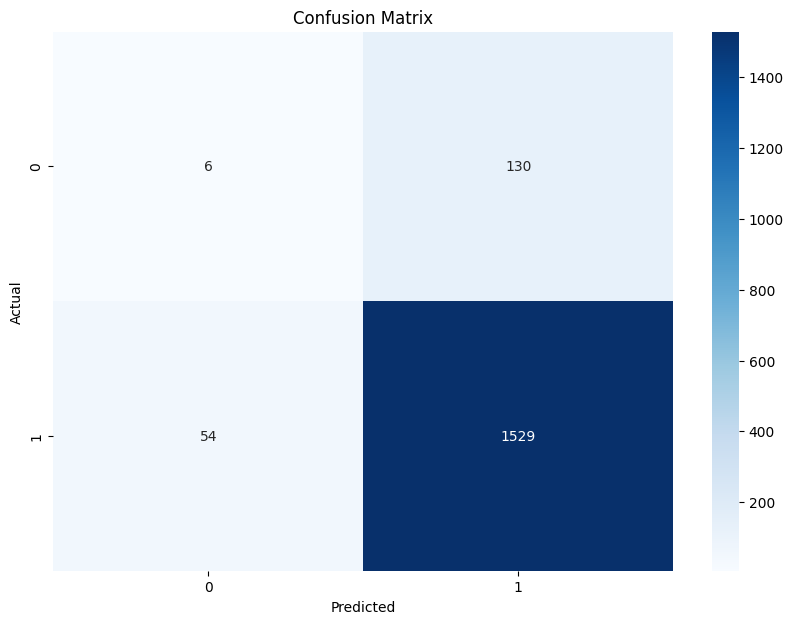

linear
Accuracy: 0.9208842350203607
F1 Score: 0.0
Recall: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       136
         2.0       0.92      1.00      0.96      1583

    accuracy                           0.92      1719
   macro avg       0.46      0.50      0.48      1719
weighted avg       0.85      0.92      0.88      1719



c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aidin\.virtualenvs\SVM-sEzdJoZE\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

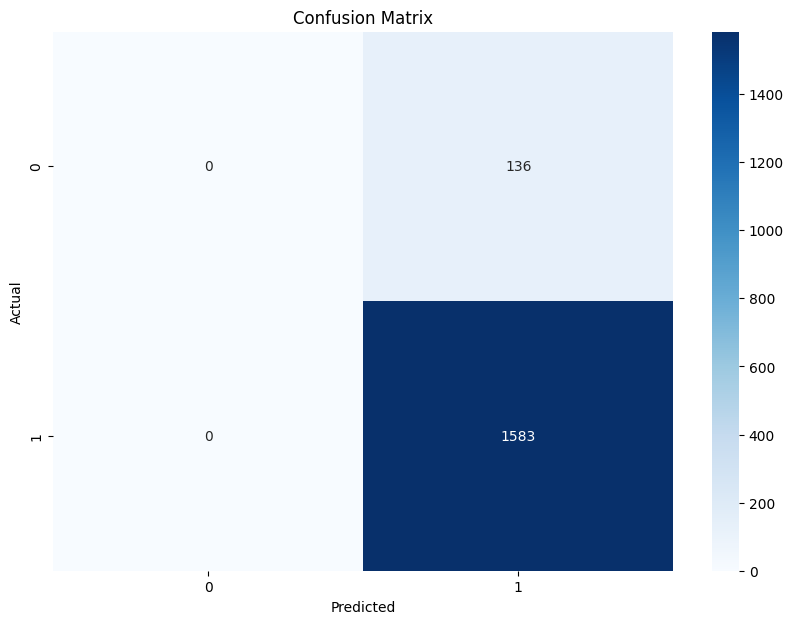

poly
Accuracy: 0.9197207678883071
F1 Score: 0.0
Recall: 0.0
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       136
         2.0       0.92      1.00      0.96      1583

    accuracy                           0.92      1719
   macro avg       0.46      0.50      0.48      1719
weighted avg       0.85      0.92      0.88      1719



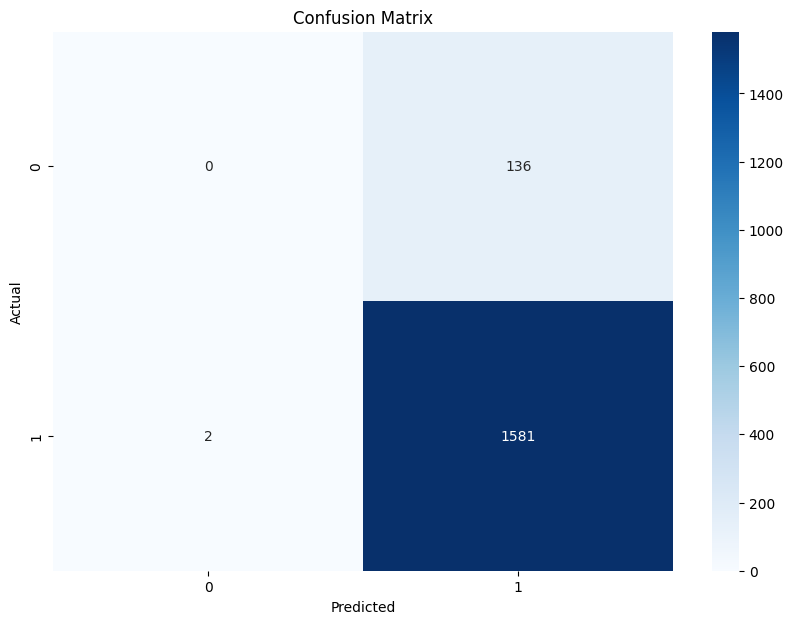

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('health_survay.csv')
data['SEQN'] = data['SEQN'].astype(float)

indices_to_drop = data[data['HIQ210'] == 9.0].index
data.drop(indices_to_drop, inplace=True)

simple_imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(simple_imputer.fit_transform(data), columns=data.columns)

# Split the data into features and target
X = data.drop(columns=['HIQ210'])
y = data['HIQ210']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

kernels = ["rbf", "sigmoid", "linear", "poly"]
for kernel_c in kernels:
# Create and train the SVM model
    print(kernel_c)
    svm_rbf = SVC(kernel=kernel_c, probability=True)
    svm_rbf.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = pd.Series(svm_rbf.predict(X_test_scaled))

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    f1 = f1_score(y_test, y_pred, average='binary')
    print(f"F1 Score: {f1}")

    recall = recall_score(y_test, y_pred, average='binary')
    print(f"Recall: {recall}")

    # Detailed classification report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
